In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from ast import literal_eval
import datetime
import time  # for timing
import joblib # for saving objects


TESTING = False
REGENERATE = False

if TESTING:
    dataset_name = 'netflix'
else:
    dataset_name = input("Enter dataset name: ")

# Search file with levinstein distance

dataset_files = []
for root, dirs, files in os.walk("data"):
    for file in files:
        if file.endswith(".csv"):
            dataset_files.append(file)


def calculate_levenshtein(str1, str2):
    replacementCost = [[]]

    for i in range(len(str1) + 1):
        replacementCost.append([])
        for j in range(len(str2) + 1):
            if i == 0:
                replacementCost[i].append(j)
            elif j == 0:
                replacementCost[i].append(i)
            elif str1[i - 1] == str2[j - 1]:
                replacementCost[i].append(replacementCost[i - 1][j - 1])
            else:
                replacementCost[i].append(1 + min(replacementCost[i - 1][j], replacementCost[i][j - 1],
                                                  replacementCost[i - 1][j - 1]))

    return replacementCost[len(str1)][len(str2)]


# Find the closest file
scores = []

for file in dataset_files:
    print(file)
    scores.append(calculate_levenshtein(dataset_name, file.split("_data")[0]))

closest_file_name = dataset_files[scores.index(min(scores))]
print("Closest file: " + closest_file_name)

# Load the dataset
df = pd.read_csv("data/" + closest_file_name)

df = df.drop(columns=["imdb_id"])

# print(df)
df["score_avg"] = (df["imdb_score"] + df["tmdb_score"]) / 2

hulu-tv_data.csv
hbo-max_data.csv
paramount-tv_data.csv
disney-+_data.csv
crunchyroll_data.csv
rakuten-viki-tv_data.csv
dark-matter-tv_data.csv
netflix_data.csv
amazon-prime_data.csv
Closest file: netflix_data.csv


In [18]:
class Progressbar:

    def __init__(self, maxValue, startTime=time.time()):
        self.startTime = startTime
        self.maxValue = maxValue

    def update(self, index):
        valueLength = len(str(self.maxValue))
        indexString = str(index)
        # while len(str(indexString)) < valueLength:
        #     indexString = " " + indexString

        indexString.rjust(valueLength - len(indexString))

        print("\rProgress: [{0:50s}] {1:.1f}%".format('#' * int((index + 1) * 50 / self.maxValue), (index + 1) * 100 / self.maxValue)
              + "    " + indexString + "/" + str(self.maxValue) + "    " +
              "Time left: {}".format(str(datetime.timedelta(seconds=(self.maxValue - (index + 1)) * (time.time() - self.startTime) / (index + 1)))), end="", flush=True)


In [19]:
unique_genres = []

for index, row in df.iterrows():
    row["genres"] = literal_eval(row["genres"])
    for genre in row["genres"]:
        if genre not in unique_genres:
            unique_genres.append(genre)

df["genres_index"] = df["genres"].apply(lambda x: [unique_genres.index(i) for i in literal_eval(x)])

In [20]:
unique_production_countries = []

for index, row in df.iterrows():
    row["production_countries"] = literal_eval(row["production_countries"])
    for production_country in row["production_countries"]:
        if production_country not in unique_production_countries:
            unique_production_countries.append(production_country)

df["production_countries_index"] = df["production_countries"].apply(
    lambda x: [unique_production_countries.index(i) for i in literal_eval(x)])


In [21]:
unique_types = []

for index, row in df.iterrows():
    if row["type"] not in unique_types:
        unique_types.append(row["type"])

df["type_index"] = df["type"].apply(lambda x: unique_types.index(x))

In [22]:
unique_age_certifications = []

for index, row in df.iterrows():
    if row["age_certification"] not in unique_age_certifications:
        unique_age_certifications.append(row["age_certification"])

df["age_certification_index"] = df["age_certification"].apply(
    lambda x: unique_age_certifications.index(x))

In [23]:
df_splitted = pd.DataFrame(columns=df.columns)
df_splitted.drop(columns=["genres", "production_countries", "type", "age_certification"], inplace=True)

progressBar = Progressbar(len(df))

save_name = "saved/splitted_data_" + \
    dataset_name.split(".")[0].split("_")[0] + ".df"

if REGENERATE or not os.path.exists(save_name):
    for index, row in df.iterrows():

        progressBar.update(index)

        for genre_index in row["genres_index"]:
            row_copy = row.copy()
            row_copy["genres_index"] = genre_index

            for production_country_index in row_copy["production_countries_index"]:
                row_copy2 = row_copy.copy()
                row_copy2["production_countries_index"] = production_country_index        

                # df_splitted = df_splitted.append(pd.DataFrame(data=row_copy2))
                # df_splitted = pd.concat([df_splitted, pd.DataFrame(data=row_copy2)])

                df_splitted.loc[len(df_splitted)] = row_copy2

            # df_splitted = pd.concat([df_splitted, pd.DataFrame(data=row_copy)])
            
    joblib.dump(df_splitted, save_name)
else:
    df_splitted = joblib.load(save_name)

df_splitted

Progress: [##################################################] 100.0%    9870/9871    Time left: 0:00:00.011104

,id,title,description,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,score_avg,genres_index,production_countries_index,type_index,age_certification_index
0,ts20945,The Three Stooges,The Three Stooges were an American vaudeville ...,1934,19,26.0,8.6,1092.0,15.424,7.6,8.1,0,0,0,0
1,ts20945,The Three Stooges,The Three Stooges were an American vaudeville ...,1934,19,26.0,8.6,1092.0,15.424,7.6,8.1,1,0,0,0
2,ts20945,The Three Stooges,The Three Stooges were an American vaudeville ...,1934,19,26.0,8.6,1092.0,15.424,7.6,8.1,2,0,0,0
3,ts20945,The Three Stooges,The Three Stooges were an American vaudeville ...,1934,19,26.0,8.6,1092.0,15.424,7.6,8.1,3,0,0,0
4,ts20945,The Three Stooges,The Three Stooges were an American vaudeville ...,1934,19,26.0,8.6,1092.0,15.424,7.6,8.1,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24496,tm1078263,Good Boys for Life,"Toddrick Frank, a hustler, living his life unt...",2021,73,NaN,3.9,50.0,2.076,NaN,NaN,0,0,1,1
24497,tm1078263,Good Boys for Life,"Toddrick Frank, a hustler, living his life unt...",2021,73,NaN,3.9,50.0,2.076,NaN,NaN,6,0,1,1
24498,tm510327,Lily Is Here,Dallas and heroin have one thing in common: Du...,2021,93,NaN,5.3,20.0,1.406,NaN,NaN,6,0,1,1
24499,tm1079144,Jay Nog: Something from Nothing,Something From Nothing takes you on a stand-up...,2021,55,NaN,NaN,NaN,0.6,NaN,NaN,0,0,1,1


In [24]:
# display the top 3 movies with the highest Imdb_score
df.sort_values(by=["imdb_score"], ascending=False, inplace=True)

# visualize the data
df.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,score_avg,genres_index,production_countries_index,type_index,age_certification_index
9135,tm1159926,Pawankhind,MOVIE,The story of the Maratha Warriors at the battl...,2022,NaN,153,"['action', 'drama', 'history']",['IN'],NaN,9.9,2036.0,3.812,8.5,9.20,"[3, 6, 13]",[6],1,1
7783,ts231725,Water Helps the Blood Run,SHOW,"Five orphan girls from diverse backgrounds, ca...",2019,NaN,29,"['drama', 'comedy']",[],1.0,9.7,30.0,NaN,NaN,NaN,"[6, 0]",[],0,1
9108,ts304299,Couple of Mirrors,SHOW,"You Yi is a young, innocent, and kind-hearted ...",2021,NaN,46,"['drama', 'romance', 'crime']",['CN'],1.0,9.5,99.0,5.116,8.0,8.75,"[6, 10, 12]",[18],0,1


In [25]:
df_splitted_noNull= df_splitted.dropna() 

# Split in train and test set
X = df_splitted_noNull.drop(columns=['id', 'score_avg', 'title', 'description'])
y = df_splitted_noNull['score_avg']
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

print(df_splitted_noNull.columns)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)
score


Index(['id', 'title', 'description', 'release_year', 'runtime', 'seasons',
       'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score',
       'score_avg', 'genres_index', 'production_countries_index', 'type_index',
       'age_certification_index'],
      dtype='object')


0.979890310786106

In [26]:
# generate new movie row with random data 
new_movie = pd.DataFrame(columns=df_splitted_noNull.columns)
new_movie.drop(columns=["genres", "production_countries", "type", "age_certification"], inplace=True)
 

KeyError: "['genres', 'production_countries', 'type', 'age_certification'] not found in axis"

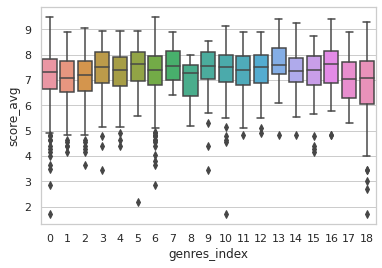

0 -> comedy
1 -> family
2 -> animation
3 -> action
4 -> fantasy
5 -> horror
6 -> drama
7 -> war
8 -> western
9 -> european
10 -> romance
11 -> thriller
12 -> crime
13 -> history
14 -> sport
15 -> scifi
16 -> documentation
17 -> music
18 -> reality


In [44]:
# visualize genres and score_avg using sns boxplot
sns.boxplot(x="genres_index", y="score_avg", data=df_splitted_noNull)
plt.show()

for i in range(0, len(unique_genres)):
    print(i.__str__() + " -> " + unique_genres[i])